# Task 2: Clustering

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Customer Profile model

In [216]:
customer_profile = pd.read_csv('../dataset/customer_profile_model.csv', sep='\t', index_col=0)
customer_profile

,I,Iu,Imax,E,Monetary,Recency,T,Frequency
CustomerID,,,,,,,,
12747.0,6.674561,3.367296,4.941642,1.465815,5.762366,2.079442,5.831882,5.467828
12748.0,9.485925,7.273786,7.108244,1.899053,5.814429,4.553877,5.828946,5.230059
12749.0,7.110696,4.787492,6.439350,1.557404,5.746523,1.098612,5.817111,6.259486
12820.0,6.513230,3.988984,5.497168,1.410074,5.642262,1.098612,5.789960,5.526064
12822.0,6.122493,3.610918,5.913503,1.413603,2.839078,0.000000,4.477337,5.050369
...,...,...,...,...,...,...,...,...
18272.0,7.367709,4.477337,5.863631,1.557192,5.407620,1.609438,5.420535,6.203935
18273.0,3.688879,0.000000,2.995732,-2.302585,4.673763,0.000000,5.552960,3.933784
18282.0,3.931826,2.079442,3.258097,1.047319,4.443827,0.000000,5.707110,4.109069


In [217]:
customer_profile = customer_profile.to_numpy()

## Standardization \& Dimensionality Reduction

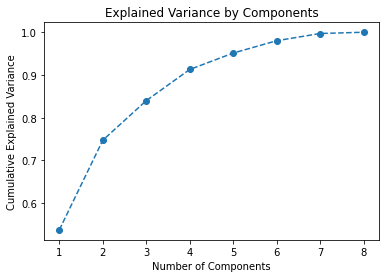

In [218]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
std_customer_profile = scaler.fit_transform(customer_profile)

pca = PCA()
pca.fit(std_customer_profile)

plt.plot(range(1, customer_profile.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

The graph shows the amount of variance captured depending on the number of components we include. A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 2 components.

In [219]:
pca = PCA(n_components=2)
pca_customer_profile = pca.fit_transform(std_customer_profile)

## K-means

In [220]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [221]:
score = []
for k in range(2, 10):
    kmeans = KMeans(init='k-means++', n_clusters=k)
    clusters = kmeans.fit_predict(pca_customer_profile)
    score.append(kmeans.inertia_)
    print("For k =", k, "the silhouette score is:", silhouette_score(pca_customer_profile, clusters))

For k = 2 the silhouette score is: 0.4078387145491605
For k = 3 the silhouette score is: 0.3486474719595884
For k = 4 the silhouette score is: 0.3716532435629627
For k = 5 the silhouette score is: 0.3317814904121432
For k = 6 the silhouette score is: 0.33935906162586577
For k = 7 the silhouette score is: 0.3386760283189863
For k = 8 the silhouette score is: 0.3315075036954048
For k = 9 the silhouette score is: 0.32738873734700863


The best silhouette score obtained is when the number of clusters is 2.

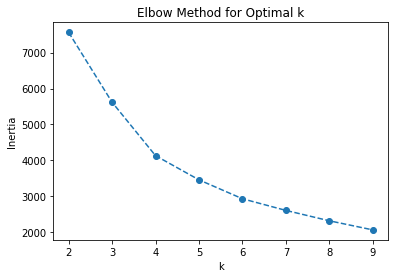

In [222]:
plt.plot(range(2, 10), score, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.ylabel('Inertia')
plt.xlabel('k');

In [223]:
kmeans = KMeans(init='k-means++', n_clusters=2)
clusters_customers = kmeans.fit_predict(pca_customer_profile)

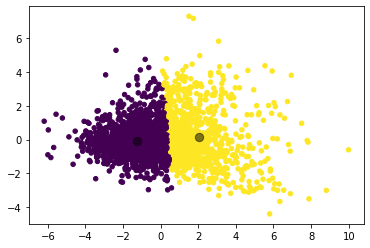

In [224]:
# create a scatter plot
plt.scatter(pca_customer_profile[:, 0], pca_customer_profile[:, 1], c=clusters_customers, s=20)
# select cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.5);

What's the number of customers in each cluster?

In [227]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T

,0,1
CustomersNb,1404,877


For comparison, if we run only the k-means algorithm without the PCA step, the result would be the following:

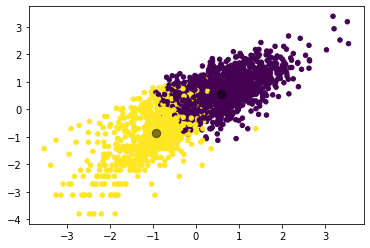

In [228]:
# create a scatter plot
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20)
# select cluster centers
centroids = pca.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.5);

## DBSCAN

In [229]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [230]:
for eps in (0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5):
    dbscan = DBSCAN(eps=eps, min_samples=10)
    clusters = dbscan.fit_predict(pca_customer_profile)
    print("For eps =", eps, "the silhouette score is:", silhouette_score(pca_customer_profile, clusters))

For eps = 0.1 the silhouette score is: -0.49181009078425025
For eps = 0.15 the silhouette score is: -0.4261456444763971
For eps = 0.2 the silhouette score is: -0.27122287387517613
For eps = 0.25 the silhouette score is: -0.061241375957141755
For eps = 0.3 the silhouette score is: 0.2459351431418358
For eps = 0.35 the silhouette score is: 0.4328829080621841
For eps = 0.4 the silhouette score is: 0.4507804235377279
For eps = 0.45 the silhouette score is: 0.3523764513596492
For eps = 0.5 the silhouette score is: 0.39228585871922855


The best silhouette score obtained is when the eps is 0.4.

In [231]:
dbscan = DBSCAN(eps=0.4, min_samples=10)
clusters_customers = dbscan.fit_predict(pca_customer_profile)

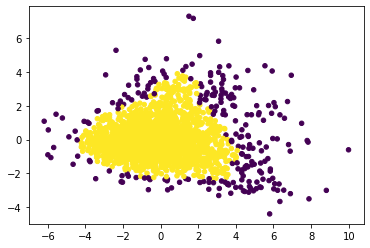

In [232]:
# create a scatter plot
plt.scatter(pca_customer_profile[:, 0], pca_customer_profile[:, 1], c=clusters_customers, s=20);

What's the number of customers in each cluster?

In [233]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T

,0,-1
CustomersNb,2045,236


For comparison, if we run only the DBSCAN algorithm without the PCA step, the result would be the following:

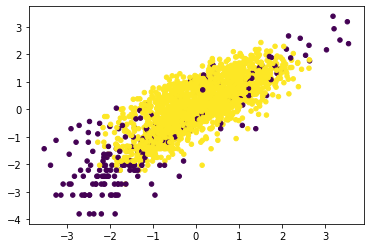

In [234]:
# create a scatter plot
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20);

## Agglomerative Clustering

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion:

- *Ward* minimizes the euclidean distance of the clusters being merged (is the hierarchical analogue of K-means, so it can be used to initialize it)
    - strength: less susceptible to noise and outliers
    - limitations: biased towards globular clusters
- *single* or *maximum linkage* uses the minimum of the distances between all observations of the two sets
    - strength: can handle non-elliptical shapes
    - limitations: sensitive to noise and outliers
- *complete* or *maximum linkage* uses the maximum distances between all observations of the two sets
    - strength: less susceptible to noise and outliers
    - limitations: tends to break large clusters, biased towards globular clusters
- *average* linkage is a compromise between *single* and *complete* linkage by using the average of the distances of each observation of the two sets
    - strength: less susceptible to noise and outliers
    - limitations: biased towards globular clusters

### Ward Linkage

In [107]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           # skipping PCA since agglomerative clustering uses the Feature Agglomeration to group together features 
                           # that look very similar, thus decreasing the number of features. It is a dimensionality reduction tool.
                           ('clustering', AgglomerativeClustering(linkage='ward'))])

n_features = customer_profile.shape[1]

# parameters of pipelines can be set using ‘__’ separated parameter names
tuned_parameters = {
    'clustering__n_clusters' : range(2, 10)}

search = GridSearchCV(estimator=pipeline, 
                      param_grid=tuned_parameters, 
                      scoring=silhouette_scorer, 
                      cv=[(slice(None), slice(None))],  # https://stackoverflow.com/a/44682305/5555994
                      n_jobs=-1,  # use all processors
                      refit=True, 
                      verbose=True).fit(customer_profile)

Fitting 1 folds for each of 8 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    1.9s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


In [108]:
agglomerative_results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
agglomerative_results.head(10).style.apply(highlight_equal, value=1, column=['rank_test_score'], axis=1).hide_index()

params,mean_test_score,rank_test_score
{'clustering__n_clusters': 2},0.310335,1
{'clustering__n_clusters': 3},0.297844,2
{'clustering__n_clusters': 4},0.269474,3
{'clustering__n_clusters': 5},0.174692,4
{'clustering__n_clusters': 7},0.172166,5
{'clustering__n_clusters': 6},0.168517,6
{'clustering__n_clusters': 9},0.146249,7
{'clustering__n_clusters': 8},0.145412,8


What's the number of customers in each cluster?

In [110]:
scaled_customer_profile = search.best_estimator_['scaler'].transform(customer_profile)
clusters_customers = search.best_estimator_['clustering'].fit_predict(scaled_customer_profile)
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNo']).T

,1,0
CustomersNo,1342,939


### Single Linkage

In [85]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           # skipping PCA since agglomerative clustering uses the Feature Agglomeration to group together features 
                           # that look very similar, thus decreasing the number of features. It is a dimensionality reduction tool.
                           ('clustering', AgglomerativeClustering(linkage='single'))])

n_features = customer_profile.shape[1]

# parameters of pipelines can be set using ‘__’ separated parameter names
tuned_parameters = {
    'clustering__n_clusters' : range(2, 10),
    'clustering__affinity': ('euclidean', 'manhattan', 'cosine')}

search = GridSearchCV(estimator=pipeline, 
                      param_grid=tuned_parameters, 
                      scoring=silhouette_scorer, 
                      cv=[(slice(None), slice(None))],  # https://stackoverflow.com/a/44682305/5555994
                      n_jobs=-1,  # use all processors
                      refit=True, 
                      verbose=True).fit(customer_profile)

Fitting 1 folds for each of 24 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished


In [86]:
agglomerative_results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
agglomerative_results.head(10).style.apply(highlight_equal, value=1, column=['rank_test_score'], axis=1).hide_index()

params,mean_test_score,rank_test_score
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 2}",0.521929,1
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 2}",0.521929,1
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 3}",0.490630,3
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 3}",0.489306,4
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 4}",0.487810,5
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 5}",0.487353,6
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 4}",0.466385,7
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 5}",0.465995,8
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 6}",0.465993,9
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 8}",0.436374,10


What's the number of customers in each cluster?

In [56]:
scaled_customer_profile = search.best_estimator_['scaler'].transform(customer_profile)
clusters_customers = search.best_estimator_['clustering'].fit_predict(scaled_customer_profile)
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNo']).T

,0,1
CustomersNo,2280,1


### Complete Linkage

In [77]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           # skipping PCA since agglomerative clustering uses the Feature Agglomeration to group together features 
                           # that look very similar, thus decreasing the number of features. It is a dimensionality reduction tool.
                           ('clustering', AgglomerativeClustering(linkage='complete'))])

n_features = customer_profile.shape[1]

# parameters of pipelines can be set using ‘__’ separated parameter names
tuned_parameters = {
    'clustering__n_clusters' : range(2, 10),
    'clustering__affinity': ('euclidean', 'manhattan', 'cosine')}

search = GridSearchCV(estimator=pipeline, 
                      param_grid=tuned_parameters, 
                      scoring=silhouette_scorer, 
                      cv=[(slice(None), slice(None))],  # https://stackoverflow.com/a/44682305/5555994
                      n_jobs=-1,  # use all processors
                      refit=True, 
                      verbose=True).fit(customer_profile)

Fitting 1 folds for each of 24 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.4s finished


In [78]:
agglomerative_results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
agglomerative_results.head(10).style.apply(highlight_equal, value=1, column=['rank_test_score'], axis=1).hide_index()

params,mean_test_score,rank_test_score
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 2}",0.521929,1
"{'clustering__affinity': 'cosine', 'clustering__n_clusters': 2}",0.316967,2
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 4}",0.270796,3
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 5}",0.267267,4
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 3}",0.266818,5
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 4}",0.262950,6
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 2}",0.262778,7
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 6}",0.257808,8
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 5}",0.256803,9
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 3}",0.246599,10


What's the number of customers in each cluster?

In [80]:
scaled_customer_profile = search.best_estimator_['scaler'].transform(customer_profile)
clusters_customers = search.best_estimator_['clustering'].fit_predict(scaled_customer_profile)
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNo']).T

,0,1
CustomersNo,2276,5


### Average Linkage

In [81]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           # skipping PCA since agglomerative clustering uses the Feature Agglomeration to group together features 
                           # that look very similar, thus decreasing the number of features. It is a dimensionality reduction tool.
                           ('clustering', AgglomerativeClustering(linkage='average'))])

n_features = customer_profile.shape[1]

# parameters of pipelines can be set using ‘__’ separated parameter names
tuned_parameters = {
    'clustering__n_clusters' : range(2, 10),
    'clustering__affinity': ('euclidean', 'manhattan', 'cosine')}

search = GridSearchCV(estimator=pipeline, 
                      param_grid=tuned_parameters, 
                      scoring=silhouette_scorer, 
                      cv=[(slice(None), slice(None))],  # https://stackoverflow.com/a/44682305/5555994
                      n_jobs=-1,  # use all processors
                      refit=True, 
                      verbose=True).fit(customer_profile)

Fitting 1 folds for each of 24 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.6s finished


In [82]:
agglomerative_results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
agglomerative_results.head(10).style.apply(highlight_equal, value=1, column=['rank_test_score'], axis=1).hide_index()

params,mean_test_score,rank_test_score
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 2}",0.521929,1
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 2}",0.458164,2
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 3}",0.445733,3
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 4}",0.428713,4
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 3}",0.422432,5
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 4}",0.342600,6
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 5}",0.340761,7
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 5}",0.335329,8
"{'clustering__affinity': 'manhattan', 'clustering__n_clusters': 6}",0.329052,9
"{'clustering__affinity': 'euclidean', 'clustering__n_clusters': 6}",0.315041,10


What's the number of customers in each cluster?

In [84]:
scaled_customer_profile = search.best_estimator_['scaler'].transform(customer_profile)
clusters_customers = search.best_estimator_['clustering'].fit_predict(scaled_customer_profile)
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNo']).T

,0,1
CustomersNo,2276,5
